# Facial Recognition using SVM

#### Importing dataset

In [1]:
from sklearn.datasets import fetch_lfw_people
import warnings; warnings.simplefilter("ignore")

faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


#### exploring dataset

In [2]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

#### Extracting key feature and classifying through a pipeline

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

#### Splitting dataset into train and test set 

In [4]:
from sklearn.model_selection import train_test_split as tts
xtr,xte,ytr,yte=tts(faces.data,faces.target,random_state=42)

#### Exploring different parameters

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.005]}
grid=GridSearchCV(model,param_grid)

%time grid.fit(xtr,ytr)
print(grid.best_params_)


CPU times: user 56.9 s, sys: 915 ms, total: 57.8 s
Wall time: 14.8 s
{'svc__C': 10, 'svc__gamma': 0.0005}


##### since values of C and gamma are from between our parameters list and not from the end, we can rely on it. If it were from the end we would need to expand our parameter grid.

### Testing

In [6]:
model=grid.best_estimator_
yfit=model.predict(xte)

Text(0.5, 0.98, 'Predicted names with errors in red')

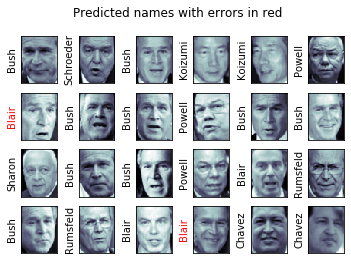

In [7]:
fig, ax=plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(xte[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i]==yte[i] else 'red')

fig.suptitle('Predicted names with errors in red')

### Accuracy metrics

In [8]:
from sklearn.metrics import classification_report
print(classification_report(yte,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.87      0.76        15
     Colin Powell       0.83      0.87      0.85        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.97      0.79      0.87       126
Gerhard Schroeder       0.68      0.91      0.78        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.85      0.98      0.91        42

         accuracy                           0.85       337
        macro avg       0.81      0.87      0.83       337
     weighted avg       0.86      0.85      0.85       337



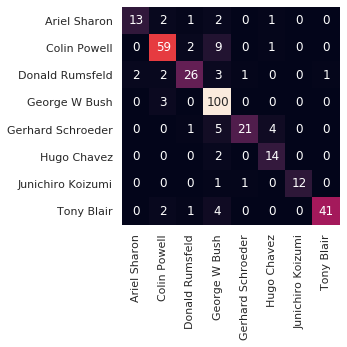

In [12]:
from sklearn.metrics import confusion_matrix
cmtx=confusion_matrix(yte,yfit)

import seaborn as sns; sns.set()
sns.heatmap(cmtx.T,square=True,annot=True,fmt='d', cbar=False,xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel=('True label')
plt.ylabel=('Predicted label');
